### 1.数据预览

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('./zhengqi_train.txt',sep='\t')
test=pd.read_csv('./zhengqi_test.txt',sep='\t')

In [3]:
# train.head()
train.columns

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'target'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns',39)
train.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,0.034319,-0.364465,0.023177,0.195738,0.016081,0.096146,0.113505,-0.043458,0.055034,-0.114884,-0.186226,-0.056556,0.302893,0.155978,-0.021813,-0.051679,0.072092,0.272407,0.137712,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,0.968272,0.858504,0.894092,0.922757,1.015585,1.033048,0.983128,0.655857,0.953466,1.108859,0.788511,0.781471,0.639186,0.978757,1.033403,0.915957,0.889771,0.270374,0.929899,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,-2.584000,-3.160000,-5.165000,-3.675000,-2.455000,-2.903000,-5.981000,-2.224000,-3.582000,-3.704000,-3.402000,-2.643000,-1.375000,-5.542000,-1.344000,-3.808000,-5.131000,-1.164000,-2.435000,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,-0.420500,-0.803250,-0.419000,-0.398000,-0.668000,-0.662250,-0.300000,-0.366000,-0.367500,-0.987500,-0.675500,-0.517000,-0.063000,0.097250,-1.191000,-0.557250,-0.452000,0.157750,-0.455000,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,0.157000,-0.112000,0.123000,0.289500,-0.161000,-0.000500,0.306000,0.165000,0.082000,-0.000500,-0.156500,-0.056500,0.216500,0.338000,0.095000,-0.076000,0.075000,0.325000,-0.447000,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,0.619250,0.247000,0.616000,0.864250,0.829750,0.730000,0.774250,0.430000,0.513250,0.737250,0.304000,0.431500,0.872000,0.368250,0.931250,0.356000,0.644250,0.442000,0.730000,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,4.830000,1.455000,2.657000,2.475000,2.558000,4.314000,2.861000,2.023000,4.441000,3.431000,3.525000,2.259000,2.018000,1.906000,2.423000,7.284000,2.980000,0.925000,4.671000,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [5]:
train.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,-0.940,-0.307,-0.073,0.550,-0.484,0.000,-1.707,-1.162,-0.573,-0.991,0.610,-0.400,-0.063,0.356,0.800,-0.223,0.796,0.168,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,0.188,-0.455,-0.134,1.109,-0.488,0.000,-0.977,-1.162,-0.571,-0.836,0.588,-0.802,-0.063,0.357,0.801,-0.144,1.057,0.338,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,0.874,-0.051,-0.072,0.767,-0.493,-0.212,-0.618,-0.897,-0.564,-0.558,0.576,-0.477,-0.063,0.355,0.961,-0.067,0.915,0.326,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,0.011,0.102,-0.014,0.769,-0.371,-0.162,-0.429,-0.897,-0.574,-0.564,0.272,-0.491,-0.063,0.352,1.435,0.113,0.898,0.277,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,-0.251,0.570,0.199,-0.349,-0.342,-0.138,-0.391,-0.897,-0.572,-0.394,0.106,0.309,-0.259,0.352,0.881,0.221,0.386,0.332,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


### 2.特征探索及特征工程

##### 2.1 删除train和test特征分布差别较大的特征

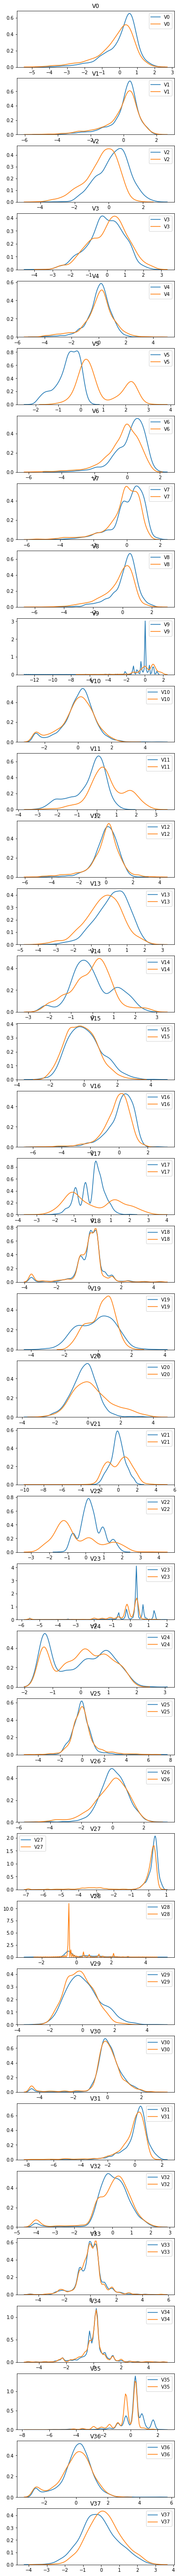

In [6]:
plt.figure(figsize=(6,100))
for i in range(0,38):
    ax=plt.subplot(38,1,i+1)
    sns.kdeplot(train.iloc[:,i],ax=ax)
    sns.kdeplot(test.iloc[:,i],ax=ax)
    ax.set_title(train.columns[i])

In [7]:
#删除train和test分布差别大的特征
columns_drop=['V5','V9','V11','V14','V17','V19','V20','V21','V22','V28']
train.drop(columns=columns_drop,inplace=True)
test.drop(columns=columns_drop,inplace=True)

##### 2.2 删除和目标列target相关性很低的特征

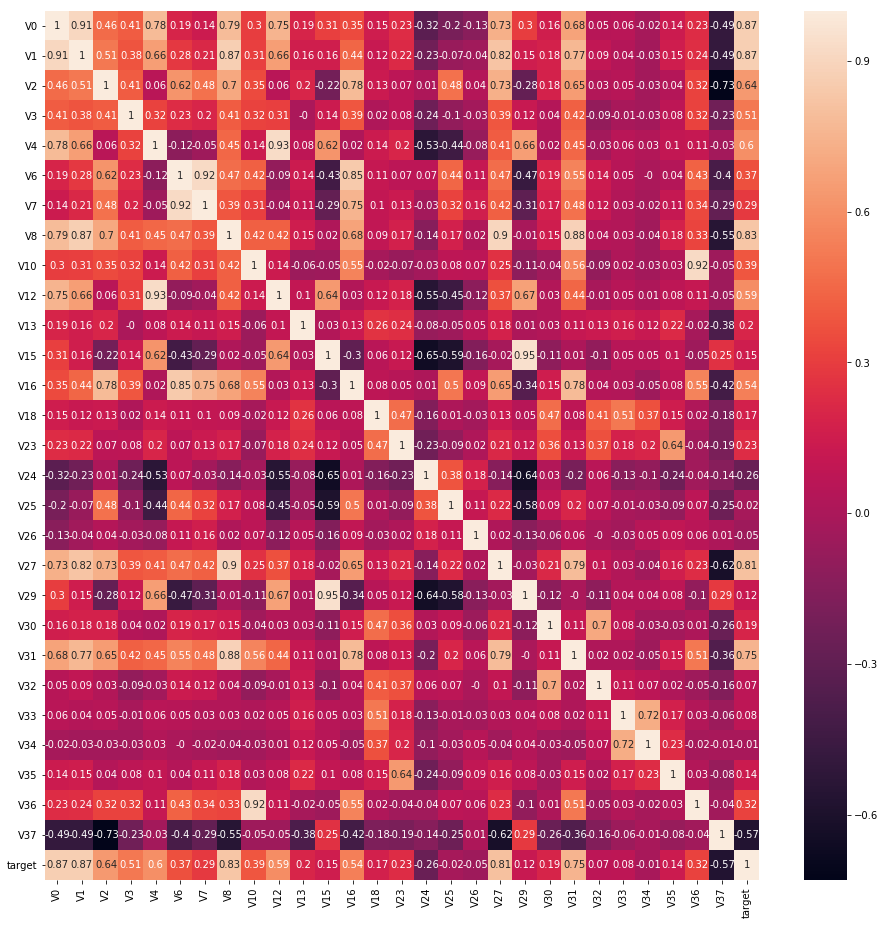

In [8]:
corr=train.corr().round(2)
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True)
plt.show()

In [9]:
#删除相关性低的变量
train.drop(columns=['V25','V29','V32','V33','V34'],inplace=True)
test.drop(columns=['V25','V29','V32','V33','V34'],inplace=True)

##### 2.3 删除方差低的变量

In [10]:
train.describe()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,V13,V15,V16,V18,V23,V24,V26,V27,V30,V31,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,0.182892,0.116155,0.177856,0.034319,0.023177,0.195738,0.096146,0.113505,0.055034,0.155978,-0.021813,0.072092,0.272407,0.055477,0.127791,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.918054,0.955116,0.895444,0.968272,0.894092,0.922757,1.033048,0.983128,0.953466,0.978757,1.033403,0.889771,0.270374,0.901934,0.873028,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-4.576000,-5.048000,-4.692000,-2.584000,-5.165000,-3.675000,-2.903000,-5.981000,-3.582000,-5.542000,-1.344000,-5.131000,-1.164000,-4.507000,-5.859000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.310000,-0.295000,-0.159000,-0.420500,-0.419000,-0.398000,-0.662250,-0.300000,-0.367500,0.097250,-1.191000,-0.452000,0.157750,-0.283000,-0.170250,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,0.388000,0.344000,0.362000,0.157000,0.123000,0.289500,-0.000500,0.306000,0.082000,0.338000,0.095000,0.075000,0.325000,0.053500,0.299500,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,0.831250,0.782250,0.726000,0.619250,0.616000,0.864250,0.730000,0.774250,0.513250,0.368250,0.931250,0.644250,0.442000,0.488000,0.635000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,1.895000,1.918000,2.245000,4.830000,2.657000,2.475000,4.314000,2.861000,4.441000,1.906000,2.423000,2.980000,0.925000,2.689000,2.013000,2.324000,5.238000,3.000000,2.538000


In [11]:
#删除方差小的特征
train.drop(columns=['V27'],inplace=True)
test.drop(columns=['V27'],inplace=True)

##### 2.4 异常值处理

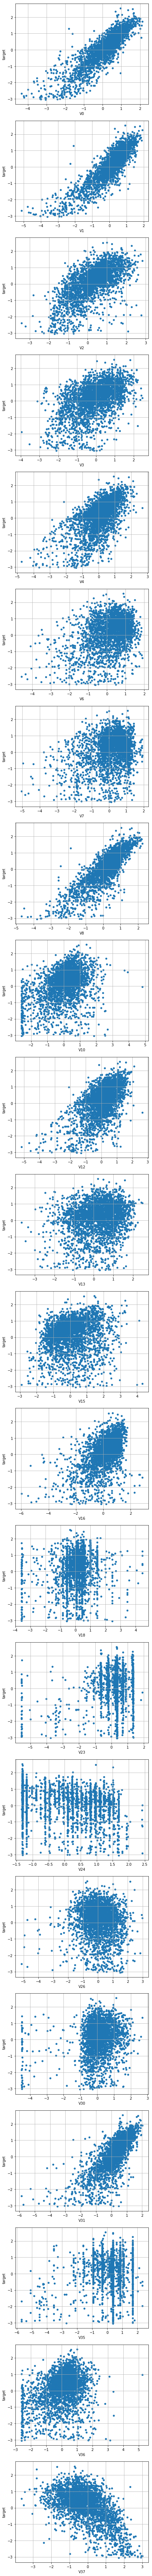

In [12]:
#散点图
plt.figure(figsize=(6,100))
features=train.columns[:-1]
for i in range(0,train.shape[1]-1):
    ax=plt.subplot(train.shape[1]-1,1,i+1)
    train.plot.scatter(x=features[i],y='target',ax=ax,grid=True)
plt.tight_layout()

In [13]:
#删除离群点
train = train.drop(train[(train['V0']<-1)&(train['target']>0.5)].index)
train = train.drop(train[(train['V1']<-2)&(train['target']>0)].index)
train = train.drop(train[(train['V8']<-1)&(train['target']>1)].index)

#### 2.5 没有正偏态(左偏)很明显的特征，所以不用对数转换

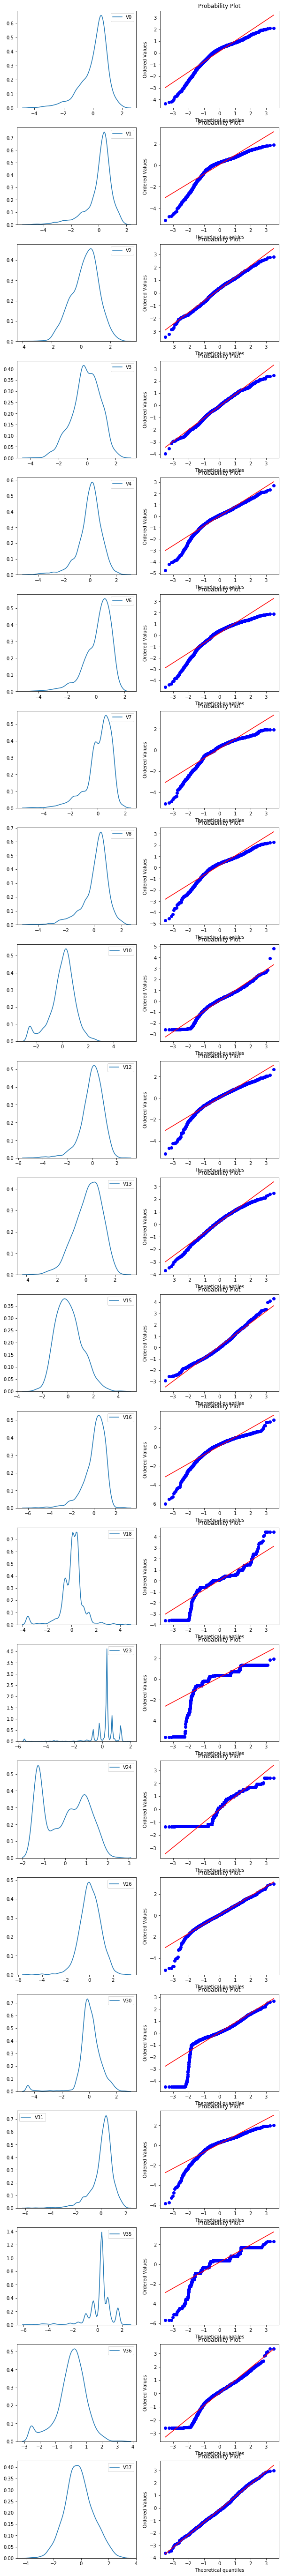

In [14]:
#kde+qq图，查看和正态分布的差异
fig,axes=plt.subplots(nrows=train.shape[1]-1,ncols=2,figsize=(10,100))
for i in range(0,train.shape[1]-1):
    sns.kdeplot(train.iloc[:,i],ax=axes[i][0])
    stats.probplot(train.iloc[:,i],plot=axes[i][1])

In [15]:
# train['37']=train['V37'].apply(lambda x:np.log(1+x))
# train['V37'] = np.log1p(train['V37'].values) 

#### 2.6 双峰处理——V24

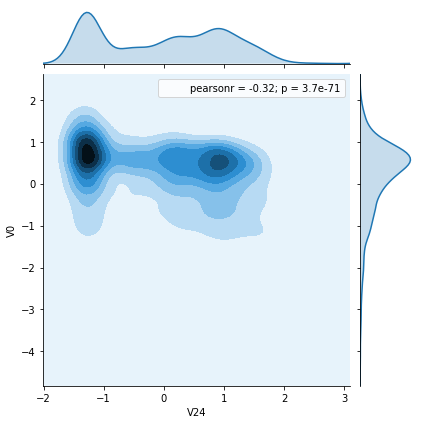

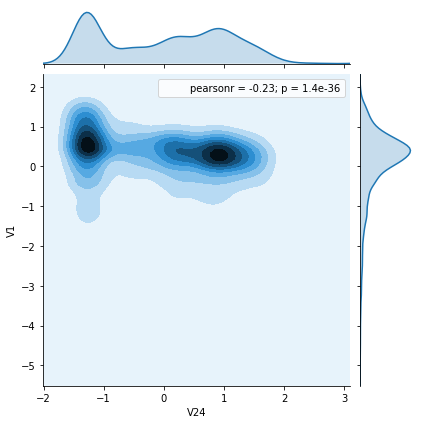

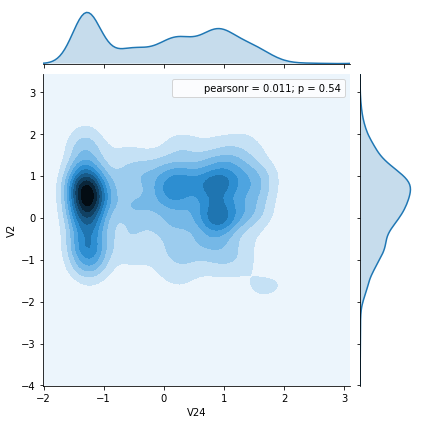

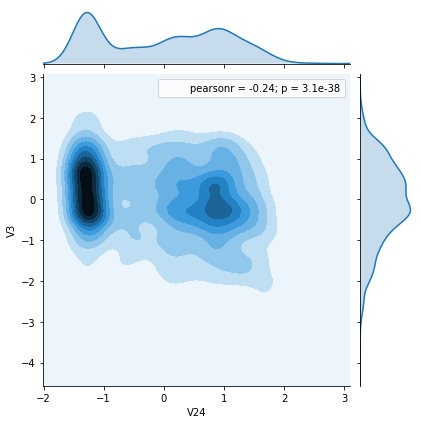

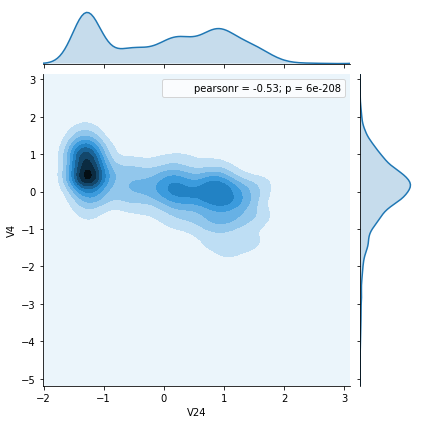

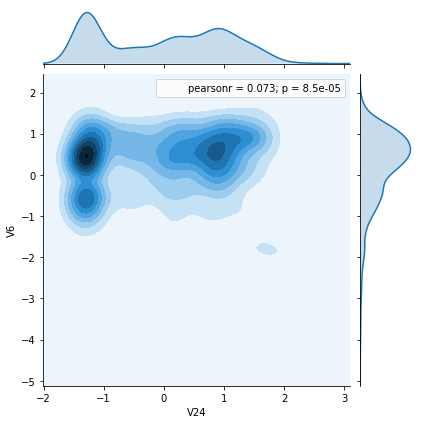

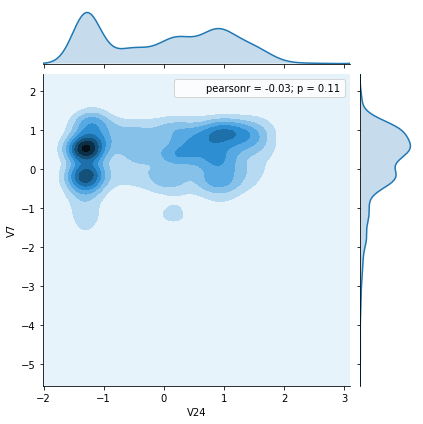

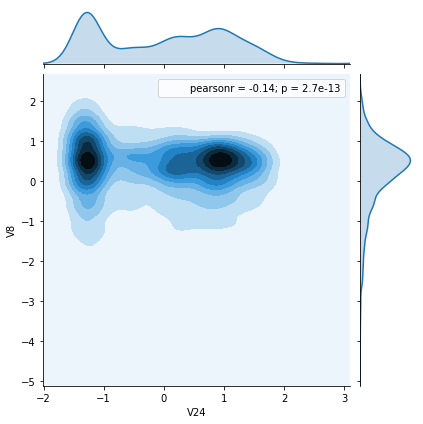

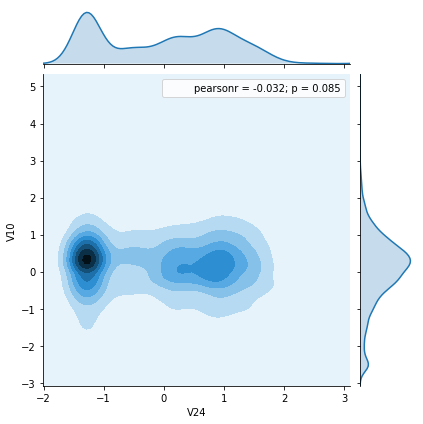

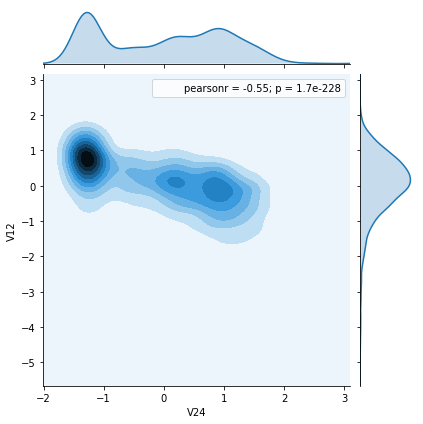

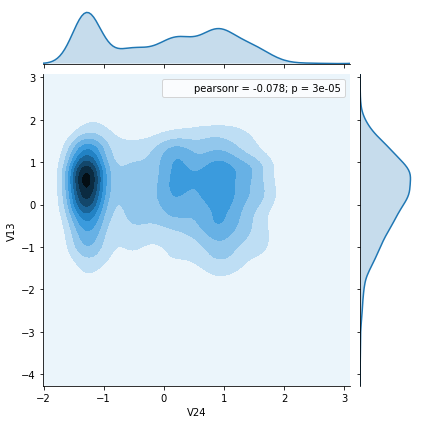

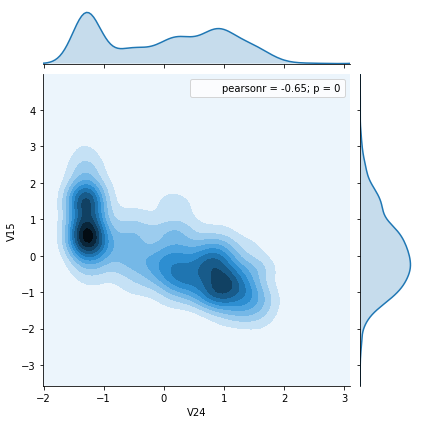

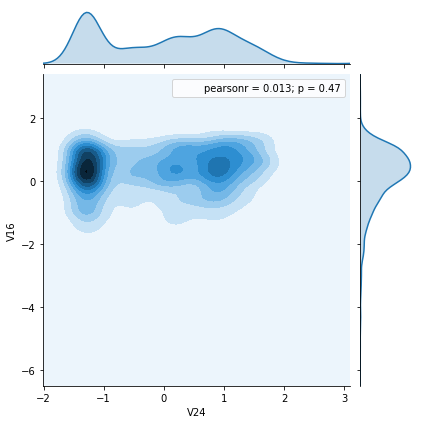

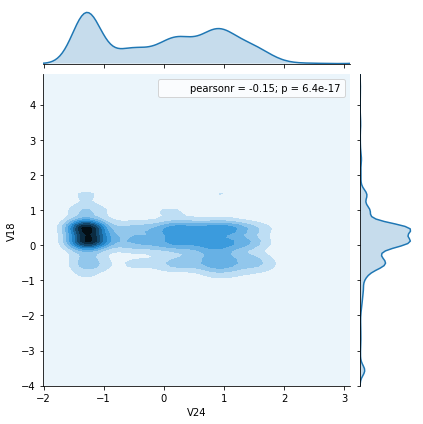

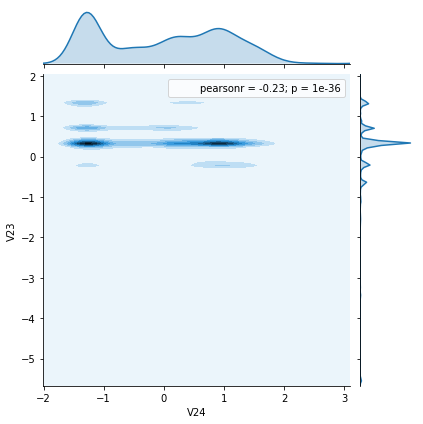

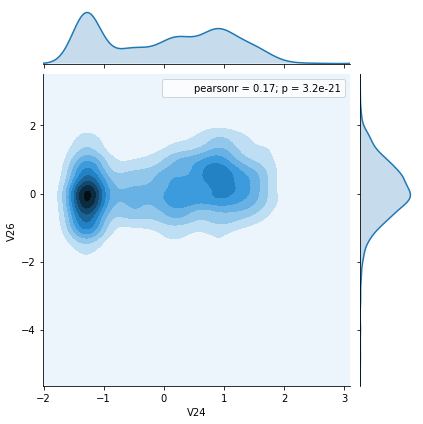

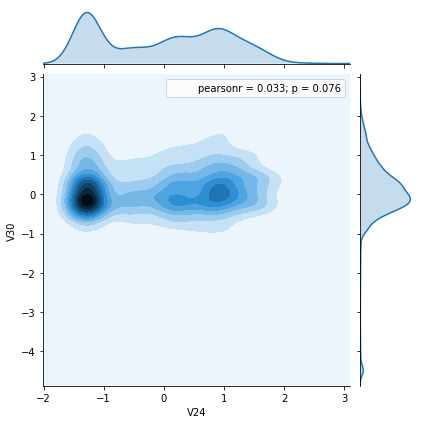

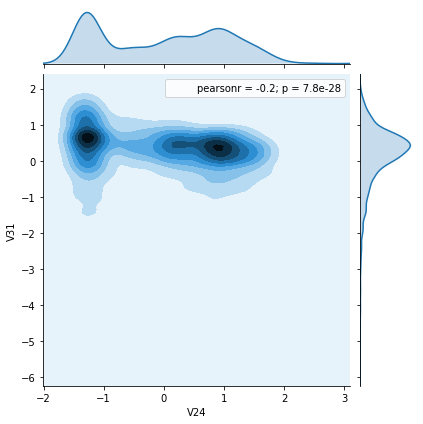

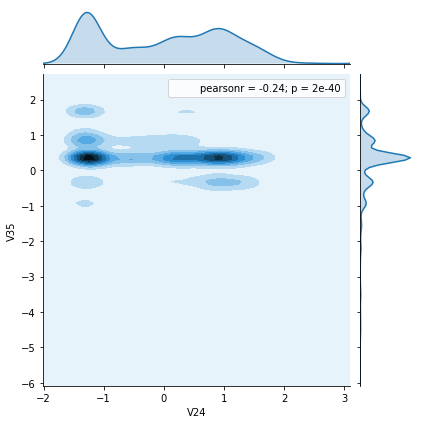

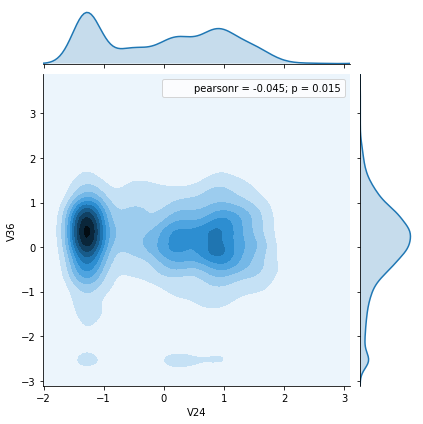

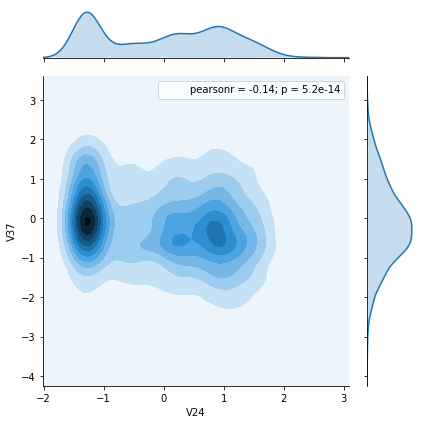

In [16]:
lst_other=list(train.columns[:-1])
lst_other.remove('V24')
for y in lst_other:
    sns.jointplot(x='V24',y=y,data=train,kind='kde')
#     sns.jointplot(x='V24',y=y,data=train,kind='reg')
plt.tight_layout()
#没有发现明显的线性关系，所以双峰特征V24不能很好地拆分

#### 2.6 标准化

In [17]:
ss=StandardScaler()
train_ss=ss.fit_transform(train)
train_ss=pd.DataFrame(train_ss,columns=train.columns)

# sns.kdeplot(train_mm.iloc[:,10])
# sns.kdeplot(train.iloc[:,10])
# sns.kdeplot(train_ss.iloc[:,10])

### 3.拟合回归预测

In [18]:
X=train_ss.drop(columns=['target'])
y=train_ss['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
# Gamma:节点分裂所需的最小损失函数下降值;样本均衡，不用设置max_delta_step
def build_model():
    svr=SVR(kernel='linear')
    linear=LinearRegression()
    lasso = Lasso(alpha =0.0005, random_state=1)
    rfr=RandomForestRegressor()
    abr=AdaBoostRegressor()
    lgbm = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=500, num_leaves=31)
    xgb =XGBRegressor(
        booster='gbtree',n_estimators=300,nthread=4,
        learning_rate=0.02, #经验值0.01~0.2
        min_child_weight=0.8,max_depth=5, #depth经验值3~10
        gamma=0.1, 
        subsample=0.8,colsample_bytree=0.8, #经验值0.5~0.9
        reg_alpha=0, reg_lambda=1,
        objective= 'reg:linear',eval_metric='rmse',
    )
    return svr,linear,lasso,abr,rfr,lgbm,xgb

In [20]:
def model_fit(models):
    for model in models:
        model.fit(X_train,y_train)

In [21]:
def cv(model,X_train,y_train):
    rand_scores = cross_val_score(model,X_train,y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores = rand_scores.mean()
    return(mean_scores)

In [22]:
%%time
name_lst=['svr','linear','lasso','rfr','abr','lgbm','xgb']
score_lst=[]
models=list(build_model())
model_fit(models)
for name,model in zip(name_lst,models):
    score = cv(model, X_train, y_train)
    score_lst.append(score)

[23:49:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 30.1 

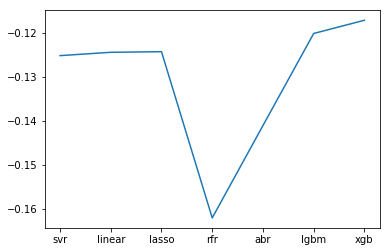

In [25]:
plt.plot(name_lst,score_lst)

### 4.lgb调参

##### 4.1 n_estimator

In [ ]:
param_test1={
    'n_estimators':[100,200,500,1000]
}
gs1=GridSearchCV(
    estimator=LGBMRegressor(
        boostint_type='gbdt',
        nthread=4,
        min_child_weight=5,min_child_samples=10, 
#         n_estimators=100,
        max_depth=5,num_leaves=31,
        subsample=0.8,colsample_bytree=0.7,
        reg_alpha=0, reg_lambda=0, 
        min_split_gain=0,
        learning_rate=0.1,
    ),
    param_grid=param_test1,scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5

)
gs1.fit(X_train,y_train)
grid_scores(gs1),gs1.best_params_,gs1.best_score_

##### 4.2 max_depth+num_leaves

In [ ]:
param_test2={
    'max_depth':range(8,14),
    'num_leaves':range(15,35,5)
}
gs2=GridSearchCV(
    estimator=LGBMRegressor(
        boostint_type='gbdt',
        nthread=4,
        min_child_weight=5,min_child_samples=10, 
        n_estimators=200,
#         max_depth=5,num_leaves=31,
        subsample=0.8,colsample_bytree=0.7,
        reg_alpha=0, reg_lambda=0, 
        min_split_gain=0,
        learning_rate=0.1
    ),
    param_grid=param_test2,scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5

)
gs2.fit(X_train,y_train)
grid_scores(gs2),gs2.best_params_,gs2.best_score_

##### 4.3 colsample_bytree+subsample

In [ ]:
param_test3={
    'colsample_bytree':[i/10.0 for i in range(5,10)],
    'subsample':[i/10.0 for i in range(1,4)]
}
gs3=GridSearchCV(
    estimator=LGBMRegressor(
        boostint_type='gbdt',
        nthread=4,
        min_child_weight=5,min_child_samples=10, 
        n_estimators=200,
        max_depth=11,num_leaves=15,
#         subsample=0.8,colsample_bytree=0.7,
        reg_alpha=0, reg_lambda=0, 
        min_split_gain=0,
        learning_rate=0.1
    ),
    param_grid=param_test3,scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5

)
gs3.fit(X_train,y_train)
grid_scores(gs3),gs3.best_params_,gs3.best_score_

##### 4.4 reg_alpha+reg_lambda

In [100]:
param_test4={
    'reg_alpha': [1e-5,1e-3,1e-1,0.0,0.1,0.3,0.5,0.7,0.9,1.0],
    'reg_lambda': [1e-5,1e-3,1e-1,0.0,0.1,0.3,0.5,0.7,0.9,1.0]
}
gs4=GridSearchCV(
    estimator=LGBMRegressor(
        boostint_type='gbdt',
        nthread=4,
        min_child_weight=5,min_child_samples=10, 
        n_estimators=200,
        max_depth=11,num_leaves=15,
        subsample=0.1,colsample_bytree=0.7,
#         reg_alpha=0, reg_lambda=0, 
        min_split_gain=0,
        learning_rate=0.1
    ),
    param_grid=param_test4,scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5

)
gs4.fit(X_train,y_train)
grid_scores(gs4),gs4.best_params_,gs4.best_score_

{'reg_alpha': 1e-05, 'reg_lambda': 1e-05} -0.113728721114984
{'reg_alpha': 1e-05, 'reg_lambda': 0.001} -0.11461855273452173
{'reg_alpha': 1e-05, 'reg_lambda': 0.1} -0.11448071402063716
{'reg_alpha': 1e-05, 'reg_lambda': 0.0} -0.11372872252660518
{'reg_alpha': 1e-05, 'reg_lambda': 0.1} -0.11448071402063716
{'reg_alpha': 1e-05, 'reg_lambda': 0.3} -0.1172184892636327
{'reg_alpha': 1e-05, 'reg_lambda': 0.5} -0.11744469354823817
{'reg_alpha': 1e-05, 'reg_lambda': 0.7} -0.11757420400665623
{'reg_alpha': 1e-05, 'reg_lambda': 0.9} -0.11734939488432487
{'reg_alpha': 1e-05, 'reg_lambda': 1.0} -0.11754905931144502
{'reg_alpha': 0.001, 'reg_lambda': 1e-05} -0.11420497725929442
{'reg_alpha': 0.001, 'reg_lambda': 0.001} -0.11486892830234285
{'reg_alpha': 0.001, 'reg_lambda': 0.1} -0.11570892563088406
{'reg_alpha': 0.001, 'reg_lambda': 0.0} -0.11420497885268413
{'reg_alpha': 0.001, 'reg_lambda': 0.1} -0.11570892563088406
{'reg_alpha': 0.001, 'reg_lambda': 0.3} -0.11601216635623124
{'reg_alpha': 0.001

(None, {'reg_alpha': 0.0, 'reg_lambda': 0.0}, -0.11372711123210608)

In [103]:
ss=StandardScaler()
test_ss=ss.fit_transform(test)
test_ss=pd.DataFrame(test_ss,columns=test.columns)

In [104]:
lgb=LGBMRegressor(
    boostint_type='gbdt',
    nthread=4,
    min_child_weight=5,min_child_samples=10, 
    n_estimators=200,
    max_depth=11,num_leaves=15,
    subsample=0.1,colsample_bytree=0.7,
    reg_alpha=0, reg_lambda=0, 
    min_split_gain=0,
    learning_rate=0.1
)
lgb.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', boostint_type='gbdt', class_weight=None,
              colsample_bytree=0.7, importance_type='split', learning_rate=0.1,
              max_depth=11, min_child_samples=10, min_child_weight=5,
              min_split_gain=0, n_estimators=200, n_jobs=-1, nthread=4,
              num_leaves=15, objective=None, random_state=None, reg_alpha=0,
              reg_lambda=0, silent=True, subsample=0.1,
              subsample_for_bin=200000, subsample_freq=0)

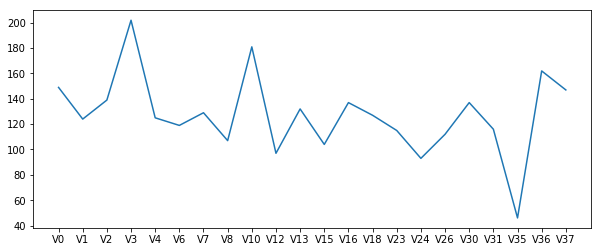

In [105]:
plt.figure(figsize=(10,4))
plt.plot(X_train.columns,lgb.feature_importances_)
plt.show()

In [106]:
# results_lgb=lgb.predict(test_ss)

# pd.DataFrame(results_lgb).to_csv('./zhengqi_result_lgb.txt',index=False, header=False)